In [1]:
import tensorflow

In [2]:
from sklearn.metrics import confusion_matrix, roc_auc_score
from sklearn.metrics import classification_report

import seaborn as sns
import matplotlib

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline

In [3]:
class Visualization:
    labels = ["Normal", "Anomaly"]

    def draw_confusion_matrix(self, y, ypred):
        matrix = confusion_matrix(y, ypred)

        plt.figure(figsize=(10, 8))
        colors=[ "orange","green"]
        sns.heatmap(matrix, xticklabels=self.labels, yticklabels=self.labels, cmap=colors, annot=True, fmt="d")
        plt.title("Confusion Matrix")
        plt.ylabel('Actual')
        plt.xlabel('Predicted')
        plt.show()


    def draw_anomaly(self, y, error, threshold):
        groupsDF = pd.DataFrame({'error': error,
                                 'true': y}).groupby('true')

        figure, axes = plt.subplots(figsize=(12, 8))

        for name, group in groupsDF:
            axes.plot(group.index, group.error, marker='x' if name == 1 else 'o', linestyle='',
                    color='r' if name == 1 else 'g', label="Anomaly" if name == 1 else "Normal")

        axes.hlines(threshold, axes.get_xlim()[0], axes.get_xlim()[1], colors="b", zorder=100, label='Threshold')
        axes.legend()
        
        plt.title("Anomalies")
        plt.ylabel("Error")
        plt.xlabel("Data")
        plt.show()

    def draw_error(self, error, threshold):
            plt.plot(error, marker='o', ms=3.5, linestyle='',
                     label='Point')

            plt.hlines(threshold, xmin=0, xmax=len(error)-1, colors="b", zorder=100, label='Threshold')
            plt.legend()
            plt.title("Reconstruction error")
            plt.ylabel("Error")
            plt.xlabel("Data")
            plt.show()

In [4]:
import pandas as pd
import numpy as np

In [5]:
df = pd.read_csv('data/creditcard.csv', sep=',', index_col=None)
print(df.shape)
df.head()

(284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
from sklearn.preprocessing import StandardScaler
df['Amount'] = StandardScaler().fit_transform(df['Amount'].values.reshape(-1, 1))

df['Time'] = StandardScaler().fit_transform(df['Time'].values.reshape(-1, 1))

df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,1.641931,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,-0.350151,0
284803,1.641952,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,-0.254117,0
284804,1.641974,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,-0.081839,0
284805,1.641974,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,-0.313249,0
284806,1.642058,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,0.514355,0


In [7]:
anomalies = df[df['Class'] == 1]
normal = df[df['Class'] == 0]

anomalies.shape, normal.shape

((492, 31), (284315, 31))

In [8]:
for f in range(0, 20):
    normal = normal.iloc[np.random.permutation(len(normal))]

data_set = pd.concat([normal[:2000], anomalies])

In [9]:
from sklearn.model_selection import train_test_split

x_train, x_test = train_test_split(data_set, test_size=0.4, random_state=42)

x_train = x_train.sort_values(by=['Time'])
x_test = x_test.sort_values(by=['Time'])
y_train = x_train['Class']
y_test = x_test['Class']

x_train.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
422,-1.990118,-2.658288,-3.014776,2.271636,-1.218204,1.546541,-1.682064,-1.524913,0.088425,-0.761266,...,-0.212736,-0.587618,0.320804,-0.013227,-0.233772,0.742313,-0.505256,0.394053,-0.141731,0
506,-1.988728,-1.254476,0.322250,1.784507,-0.307396,1.009086,-0.998491,0.328482,0.131284,-0.485255,...,-0.160980,-0.778999,-0.025359,0.000828,0.154781,0.042034,-0.019550,0.081176,-0.346073,0
545,-1.987970,-0.544922,0.595407,1.813261,-1.344670,0.016864,-0.601398,0.660876,-0.058978,0.317033,...,-0.123048,-0.148228,-0.076075,0.074036,-0.486633,0.724549,0.104294,-0.055110,-0.350151,0
623,-1.986644,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,1.761758,1
773,-1.984327,-0.185774,0.068493,0.985169,-1.608891,-0.182242,-1.220069,0.616142,-0.357735,-0.738038,...,0.199537,0.800294,-0.149953,0.385025,-0.293320,-0.355963,0.220666,0.010169,-0.281264,0


In [10]:
print('train_data shape:', x_train.shape, y_train.shape)
print('test_data shape:', x_test.shape, y_test.shape)

train_data shape: (1495, 31) (1495,)
test_data shape: (997, 31) (997,)


In [11]:
x_train = np.array(x_train).reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = np.array(x_test).reshape(x_test.shape[0], x_test.shape[1], 1)

input_shape = (x_train.shape[1], 1)
input_shape

(31, 1)

In [12]:
y_train = tensorflow.keras.utils.to_categorical(y_train, 2)
y_test = tensorflow.keras.utils.to_categorical(y_test, 2)

In [13]:
from tensorflow.keras.layers import Dense, Input, Dropout, Conv1D, SpatialDropout1D, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras import regularizers
from tensorflow.keras import Model

In [14]:
input_layer = Input(shape=(input_shape))

conv_1 = Conv1D(filters = 128, kernel_size = 2, dilation_rate = 1, padding = 'causal',
               strides=1, input_shape = input_shape, kernel_regularizer = regularizers.l2(0.01),
               activation = 'relu')(input_layer)

drop_1 = SpatialDropout1D(0.05)(conv_1)

conv_2 = Conv1D(filters = 128, kernel_size = 2, dilation_rate = 2, padding = 'causal', strides = 1,
               kernel_regularizer = regularizers.l2(0.01), activation = 'relu')(drop_1)

drop_2 = SpatialDropout1D(0.05)(conv_2)

conv_3 = Conv1D(filters = 128, kernel_size = 2, dilation_rate = 4, padding = 'causal',
               strides = 1, kernel_regularizer = regularizers.l2(0.01), activation = 'relu')(drop_2)

drop_3 = SpatialDropout1D(0.05)(conv_3)

conv_4 = Conv1D(filters = 128, kernel_size = 2, dilation_rate = 8, padding = 'causal',
               strides = 1, kernel_regularizer = regularizers.l2(0.05), activation='relu')(drop_3)

drop_4 = SpatialDropout1D(0.05)(conv_4)

In [15]:
flat = Flatten()(drop_4)

output_layer = Dense(2, activation = 'softmax')(flat)

TCN = Model(inputs = input_layer, outputs = output_layer)

In [16]:
TCN.compile(loss = categorical_crossentropy, optimizer = Adam(learning_rate=0.002),
           metrics=['mae', 'accuracy'])

In [17]:
from tensorflow.keras.callbacks import ModelCheckpoint
checkpointer = ModelCheckpoint(filepath='model_TCN_creditcard.h5', save_best_only=True)

In [18]:
TCN.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 31, 1)]           0         
                                                                 
 conv1d (Conv1D)             (None, 31, 128)           384       
                                                                 
 spatial_dropout1d (SpatialD  (None, 31, 128)          0         
 ropout1D)                                                       
                                                                 
 conv1d_1 (Conv1D)           (None, 31, 128)           32896     
                                                                 
 spatial_dropout1d_1 (Spatia  (None, 31, 128)          0         
 lDropout1D)                                                     
                                                                 
 conv1d_2 (Conv1D)           (None, 31, 128)           32896 

In [19]:
TCN.fit(x_train, y_train, batch_size=128, epochs=25, validation_data=(x_test, y_test),
       callbacks=[checkpointer])

Epoch 1/25
12/12 [==============================] - 4s 124ms/step - loss: 7.1507 - mae: 0.2620 - accuracy: 0.9298 - val_loss: 4.7061 - val_mae: 0.0912 - val_accuracy: 0.9659
Epoch 2/25
12/12 [==============================] - 1s 44ms/step - loss: 3.4530 - mae: 0.0731 - accuracy: 0.9652 - val_loss: 2.2239 - val_mae: 0.0960 - val_accuracy: 0.9639
Epoch 3/25
12/12 [==============================] - 0s 35ms/step - loss: 1.5806 - mae: 0.0741 - accuracy: 0.9659 - val_loss: 1.0203 - val_mae: 0.0943 - val_accuracy: 0.9649
Epoch 4/25
12/12 [==============================] - 0s 38ms/step - loss: 0.7218 - mae: 0.0666 - accuracy: 0.9672 - val_loss: 0.5052 - val_mae: 0.0690 - val_accuracy: 0.9589
Epoch 5/25
12/12 [==============================] - 0s 37ms/step - loss: 0.3716 - mae: 0.0694 - accuracy: 0.9659 - val_loss: 0.3164 - val_mae: 0.0659 - val_accuracy: 0.9599
Epoch 6/25
12/12 [==============================] - 0s 38ms/step - loss: 0.2452 - mae: 0.0625 - accuracy: 0.9672 - val_loss: 0.2464 - 

In [20]:
score = TCN.evaluate(x_test, y_test)

print('Test loss:', score[0])
print('Test mae:', score[1])
print('Test accuracy:', score[2])

32/32 [==============================] - 0s 8ms/step - loss: 0.1852 - mae: 0.0592 - accuracy: 0.9599
Test loss: 0.18517430126667023
Test mae: 0.05923391506075859
Test accuracy: 0.9598796367645264


In [21]:
from sklearn.metrics import roc_auc_score
preds = TCN.predict(x_test)
y_pred = np.round(preds)
auc = roc_auc_score(y_pred, y_test)

print('AUC: {:.2%}'.format(auc))

AUC: 97.11%


In [22]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98       799
           1       0.99      0.81      0.89       198

   micro avg       0.96      0.96      0.96       997
   macro avg       0.97      0.90      0.93       997
weighted avg       0.96      0.96      0.96       997
 samples avg       0.96      0.96      0.96       997



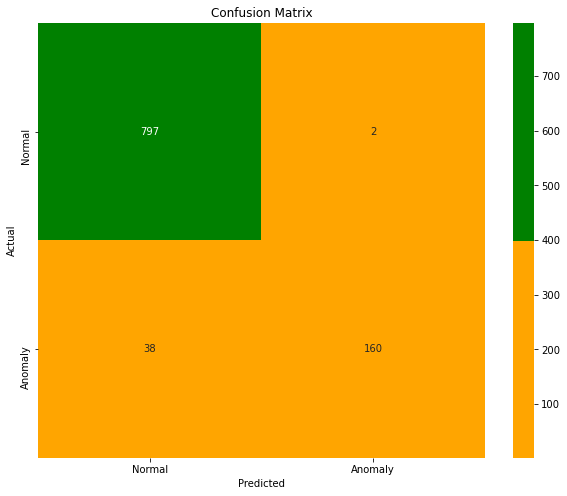

In [23]:
viz = Visualization()
y_pred2 = np.argmax(y_pred, axis=1)
y_test2 = np.argmax(y_test, axis=1)
viz.draw_confusion_matrix(y_test2, y_pred2)